In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.unitroot import VarianceRatio
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
psx = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Project Report\\Personal Research\\PSX.csv")
nep = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Project Report\\Personal Research\\NEPSE.csv")
nse = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Project Report\\Personal Research\\NSE.csv")

In [16]:
nep = nep.set_index('Date')
psx = psx.set_index('Date')
nse = nse.set_index('Date')

In [7]:
nep.describe()

,Pct
count,4621.000000
mean,0.000617
std,0.013130
min,-0.069731
25%,-0.005875
50%,0.000000
75%,0.006270
max,0.060612


In [10]:
psx.describe()

,Pct
count,4621.000000
mean,0.000617
std,0.013130
min,-0.069731
25%,-0.005875
50%,0.000000
75%,0.006270
max,0.060612


In [9]:
nse.describe()

,Pct
count,5000.000000
mean,0.000566
std,0.013312
min,-0.129800
25%,-0.005300
50%,0.000800
75%,0.007000
max,0.177400


In [17]:
nep["log"] = np.log(1 + nep["Pct"])
psx["log"] = np.log(1 + psx["Pct"])
nse["log"] = np.log(1 + nse["Pct"])

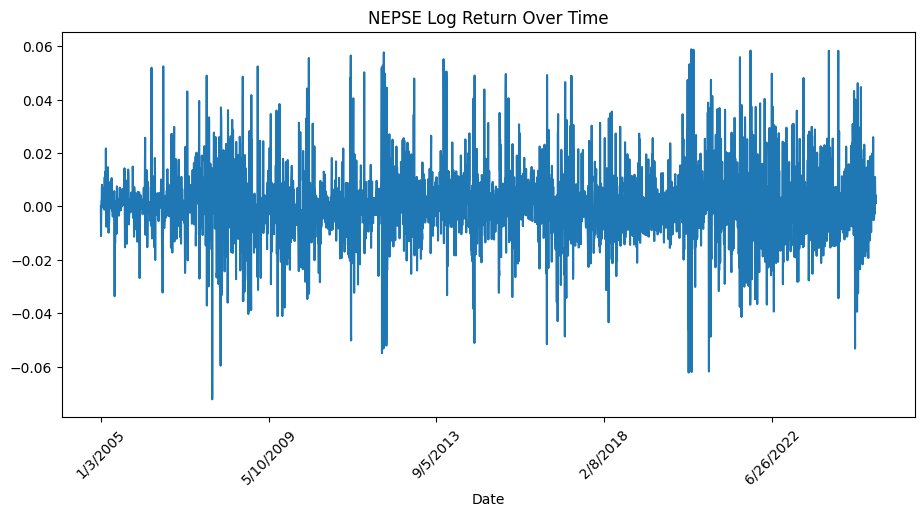

In [18]:
nep["log"].plot(title="NEPSE Log Return Over Time", figsize = (11, 5))
plt.xticks(rotation=45)
plt.show()

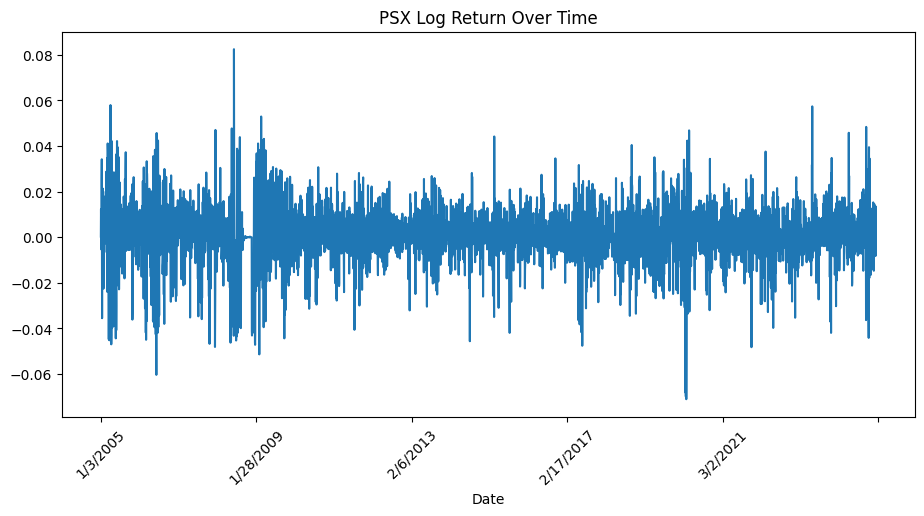

In [19]:
psx["log"].plot(title="PSX Log Return Over Time", figsize = (11, 5))
plt.xticks(rotation=45)
plt.show()

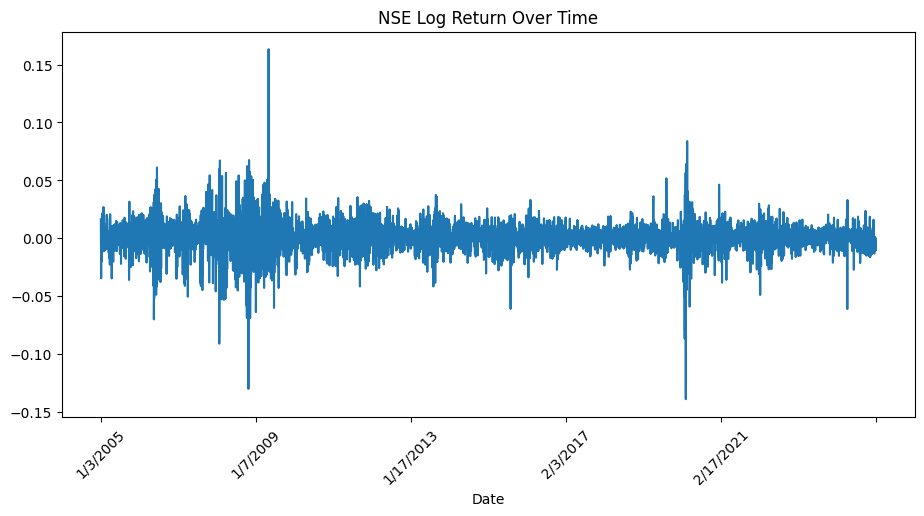

In [20]:
nse["log"].plot(title="NSE Log Return Over Time", figsize = (11, 5))
plt.xticks(rotation=45)
plt.show()

In [21]:
returns = nep['log'].dropna()
result = adfuller(returns)

print("ADF Statistic pf NEPSE", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic pf NEPSE -17.41613811186436
p-value: 4.854976037240355e-30
Critical Value (1%): -3.431769293915923
Critical Value (5%): -2.8621671627597025
Critical Value (10%): -2.567103841502722


In [22]:
returns = nse['log'].dropna()
result = adfuller(returns)

print("ADF Statistic of NSE", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic of NSE -13.770406619735617
p-value: 9.706452243959591e-26
Critical Value (1%): -3.4316651110109917
Critical Value (5%): -2.862121136215681
Critical Value (10%): -2.5670793396227367


In [24]:
returns = psx['log'].dropna()
result = adfuller(returns)

print("ADF Statistic of PSX", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic of PSX -13.698484999472436
p-value: 1.303198182471159e-25
Critical Value (1%): -3.4316685582701103
Critical Value (5%): -2.862122659192098
Critical Value (10%): -2.5670801503632363


In [25]:
# Function to run VR test
def run_vr_test(df, name, lags_list=[2, 5, 10, 20]):
    print(f"\n--- Variance Ratio Test for {name} ---")

    # Convert % return to decimal
    returns = df['log'] / 100
    returns = returns.dropna()

    for lag in lags_list:
        vr = VarianceRatio(returns, lags=lag)
        print(f"\nLag = {lag}")
        print(vr.summary())

# Run for each index
run_vr_test(nep, "NEPSE")
run_vr_test(nse, "NSE")
run_vr_test(psx, "KSE")


--- Variance Ratio Test for NEPSE ---

Lag = 2
     Variance-Ratio Test Results     
Test Statistic                -12.419
P-value                         0.000
Lags                                2
-------------------------------------

Computed with overlapping blocks (de-biased)

Lag = 5
     Variance-Ratio Test Results     
Test Statistic                -13.289
P-value                         0.000
Lags                                5
-------------------------------------

Computed with overlapping blocks (de-biased)

Lag = 10
     Variance-Ratio Test Results     
Test Statistic                -11.124
P-value                         0.000
Lags                               10
-------------------------------------

Computed with overlapping blocks (de-biased)

Lag = 20
     Variance-Ratio Test Results     
Test Statistic                 -8.621
P-value                         0.000
Lags                               20
-------------------------------------

Computed with overlappin

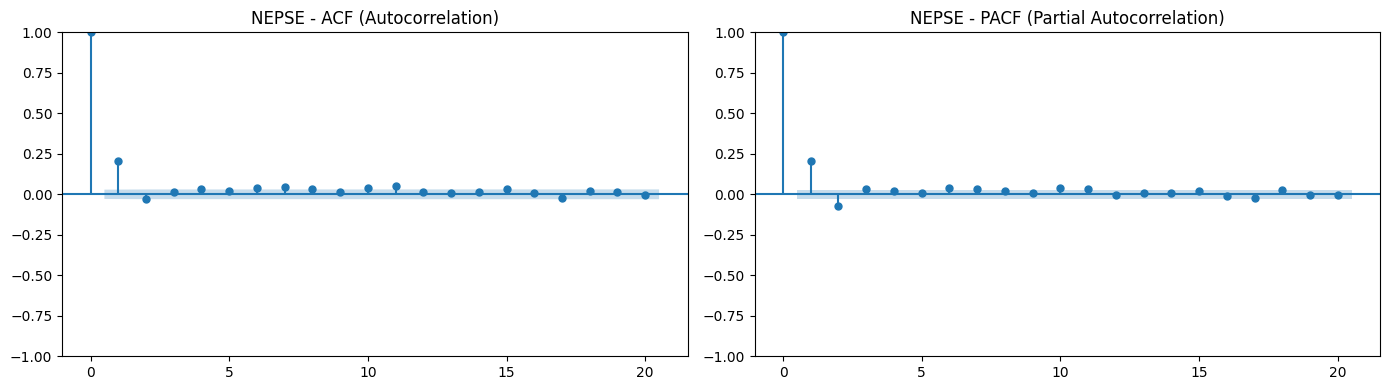


--- Ljung-Box Test for NEPSE ---
       lb_stat     lb_pvalue
10  229.654803  1.014667e-43
20  253.121271  2.679774e-42


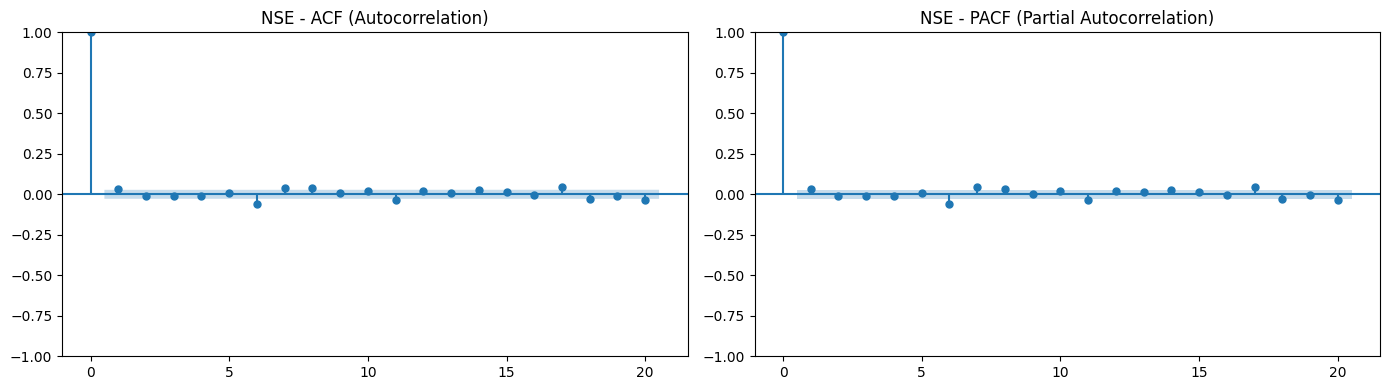


--- Ljung-Box Test for NSE ---
      lb_stat     lb_pvalue
10  43.616809  3.856405e-06
20  78.660290  6.619732e-09


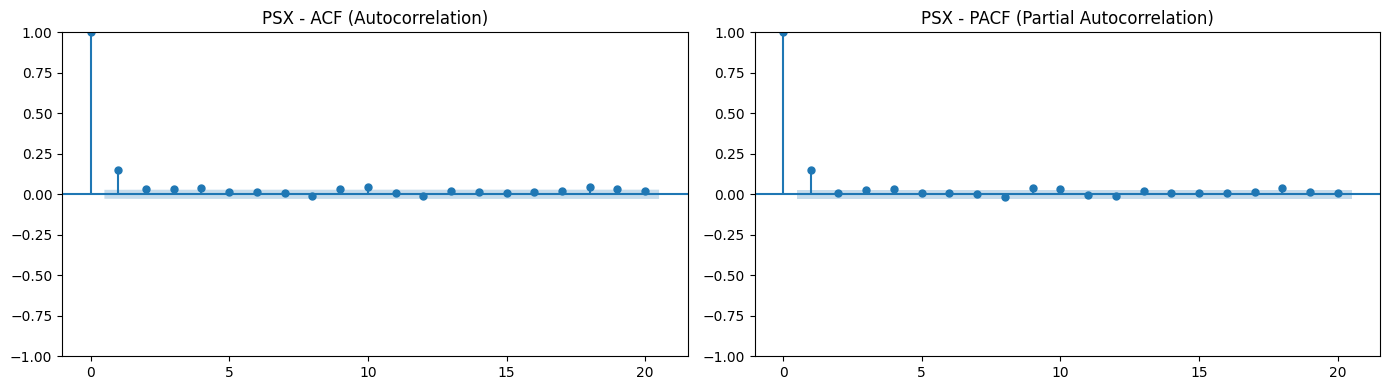


--- Ljung-Box Test for PSX ---
       lb_stat     lb_pvalue
10  150.087729  3.575754e-27
20  175.650820  6.871794e-27


In [26]:
# Function to do autocorrelation analysis
def autocorr_analysis(df, label):
    returns = df['log'].dropna()

    # Plot ACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(returns, lags=20, ax=axes[0])
    axes[0].set_title(f'{label} - ACF (Autocorrelation)')

    # Plot PACF
    plot_pacf(returns, lags=20, ax=axes[1])
    axes[1].set_title(f'{label} - PACF (Partial Autocorrelation)')
    plt.tight_layout()
    plt.show()

    # Ljung-Box test
    lb_test = acorr_ljungbox(returns, lags=[10, 20], return_df=True)
    print(f"\n--- Ljung-Box Test for {label} ---")
    print(lb_test)

autocorr_analysis(nep, "NEPSE")
autocorr_analysis(nse, "NSE")
autocorr_analysis(psx, "PSX")

In [27]:
def find_best_egarch_model(returns, max_p=3, max_q=3, lags=20):
    all_results = []
    best_model = None
    best_aic = np.inf
    best_order = None

    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                model = arch_model(returns, vol='EGARCH', p=p, q=q, o=1, dist='t')
                res = model.fit(disp='off')

                # Standardized residuals
                std_resid = res.resid / res.conditional_volatility
                lb_test = acorr_ljungbox(std_resid**2, lags=lags, return_df=True)
                passes_lb = not (lb_test['lb_pvalue'] < 0.05).any()

                all_results.append({
                    'p': p,
                    'q': q,
                    'AIC': res.aic,
                    'Pass_LjungBox': passes_lb
                })

                if passes_lb and res.aic < best_aic:
                    best_aic = res.aic
                    best_model = res
                    best_order = (p, q)

            except Exception as e:
                print(f"Skipped EGARCH({p},{q}) due to error: {e}")
                continue

    result_df = pd.DataFrame(all_results).sort_values(by='AIC')
    return best_model, best_order, best_aic, result_df

# === Example for All Markets ===
markets = {
    "NEPSE": nep['log'].dropna() * 100,
    "PSX": psx['log'].dropna() * 100,
    "NSE": nse['log'].dropna() * 100,
}

egarch_results = {}

for market_name, returns in markets.items():
    print("\n" + "="*50)
    print(f" Finding best EGARCH model for {market_name}")

    best_model, best_order, best_aic, comparison_table = find_best_egarch_model(returns)

    if best_model:
        print(f"\n Best EGARCH model for {market_name}: order (p={best_order[0]}, q={best_order[1]}) with AIC = {best_aic:.2f}")
        print("\n Model Comparison Table:")
        print(comparison_table.to_string(index=False))
        egarch_results[market_name] = best_model
    else:
        print(f" No valid EGARCH model found for {market_name}")



 Finding best EGARCH model for NEPSE

 Best EGARCH model for NEPSE: order (p=3, q=1) with AIC = 13778.19

 Model Comparison Table:
 p  q          AIC  Pass_LjungBox
 3  1 13778.189109           True
 2  1 13778.204408           True
 2  2 13780.204409           True
 3  2 13781.117673           True
 2  3 13782.204408           True
 3  3 13783.117672           True
 1  2 13785.813066           True
 1  3 13786.394654           True
 1  1 13809.894069           True

 Finding best EGARCH model for PSX

 Best EGARCH model for PSX: order (p=3, q=3) with AIC = 14285.25

 Model Comparison Table:
 p  q          AIC  Pass_LjungBox
 3  3 14285.251367           True
 2  3 14286.248982           True
 1  1 14286.299598           True
 2  2 14286.874553           True
 1  2 14286.903232           True
 1  3 14287.033660           True
 2  1 14288.249546           True
 3  2 14288.872593           True
 3  1 14290.249544           True

 Finding best EGARCH model for NSE

 Best EGARCH model for 

In [29]:
best_orders = {
    "NEPSE": ('EGARCH', 3, 1),
    "PSX": ('EGARCH', 3, 3),
    "NSE": ('EGARCH', 1, 2),
}

# === Container for model results ===
best_model_results = {}

# === Fit the models ===
for market_name, (model_type, p, q) in best_orders.items():
    print("\n" + "="*60)
    print(f"Fitting {model_type}({p},{q}) for {market_name}")

    try:
        returns = markets[market_name].dropna()

        if model_type.upper() == 'EGARCH':
            model = arch_model(returns, vol='EGARCH', p=p, q=q, o=1, dist='t')
        else:
            model = arch_model(returns, vol='GARCH', p=p, q=q, dist='t')

        res = model.fit(disp='off')
        best_model_results[market_name] = res

        print(res.summary())

    except Exception as e:
        print(f"Error fitting model for {market_name}: {e}")


Fitting EGARCH(3,1) for NEPSE
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                          log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -6881.09
Distribution:      Standardized Student's t   AIC:                           13778.2
Method:                  Maximum Likelihood   BIC:                           13829.7
                                              No. Observations:                 4621
Date:                      Sat, Jun 28 2025   Df Residuals:                     4620
Time:                              10:52:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------

In [ ]:
count = 1
datas = [nep, psx, nse]
for data in datas:
  x = data
  returns = x['log'].dropna()
  signs = np.sign(returns)

  # Remove 0s (no movement) if needed
  signs = signs[signs != 0]

  # Get the values as a numpy array for positional access
  signs_values = signs.values

  runs = 1
  # Iterate using the indices of the numpy array
  for i in range(1, len(signs_values)):
      # Compare values using integer positions
      if signs_values[i] != signs_values[i-1]:
          runs += 1
  if count == 1:
    nep_run = runs
    print(f" NEPSE actual number of runs: {runs}")
  elif count == 2:
    psx_run = runs
    print(f" PSX actual number of runs: {runs}")
  else:
    nse_run = runs
    print(f" NSE actual number of runs: {runs}")

  count += 1

 NEPSE actual number of runs: 1725
 PSX actual number of runs: 2151
 NSE actual number of runs: 2308


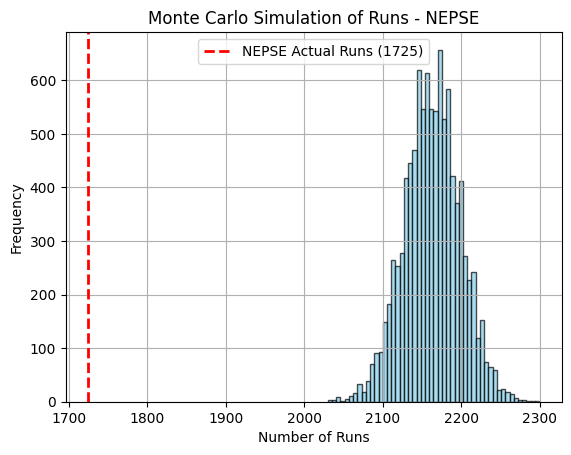


--- NEPSE ---
Simulated mean runs: 2162.64
Simulated std deviation: 35.78
Z-Score of actual runs: -12.23


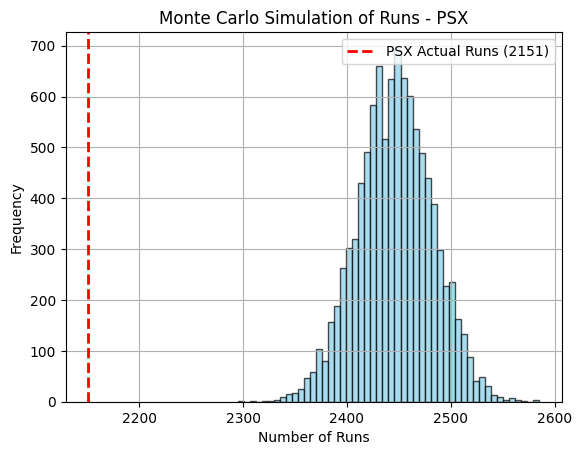


--- PSX ---
Simulated mean runs: 2446.03
Simulated std deviation: 35.87
Z-Score of actual runs: -8.23


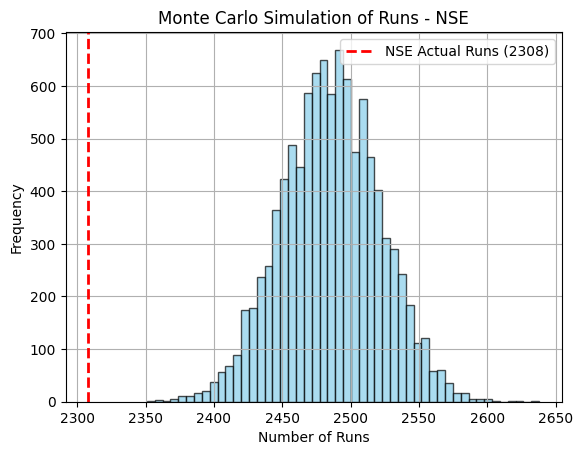


--- NSE ---
Simulated mean runs: 2485.49
Simulated std deviation: 35.96
Z-Score of actual runs: -4.94


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
datas = [nep, psx, nse]
actual_runs_list = [nep_run, psx_run, nse_run]
labels = ['NEPSE', 'PSX', 'NSE']

num_simulations = 10000

for data, actual_runs, label in zip(datas, actual_runs_list, labels):
    n = len(data)
    p_up = actual_runs / n

    simulated_runs = []
    for _ in range(num_simulations):
        sim = np.random.choice([1, -1], size=n, p=[p_up, 1 - p_up])
        run_count = 1
        for i in range(1, n):
            if sim[i] != sim[i-1]:
                run_count += 1
        simulated_runs.append(run_count)

    simulated_runs = np.array(simulated_runs)
    mean_sim = simulated_runs.mean()
    std_sim = simulated_runs.std()
    z_score = (actual_runs - mean_sim) / std_sim

    # Plot
    plt.hist(simulated_runs, bins=50, color='skyblue', edgecolor='k', alpha=0.7)
    plt.axvline(actual_runs, color='red', linestyle='--', linewidth=2,
                label=f"{label} Actual Runs ({actual_runs})")
    plt.title(f"Monte Carlo Simulation of Runs - {label}")
    plt.xlabel("Number of Runs")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print results
    print(f"\n--- {label} ---")
    print(f"Simulated mean runs: {mean_sim:.2f}")
    print(f"Simulated std deviation: {std_sim:.2f}")
    print(f"Z-Score of actual runs: {z_score:.2f}")